In [1]:
import cv2
from cv2 import imread, createCLAHE # read and equalize images

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from skimage.util import montage as montage2d

import os
from glob import glob
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!mkdir /home/datasets/TBX11K/Segmented

!mkdir /home/datasets/TBX11K/Segmented/train
!mkdir /home/datasets/TBX11K/Segmented/train/health
!mkdir /home/datasets/TBX11K/Segmented/train/sick
!mkdir /home/datasets/TBX11K/Segmented/train/tb

!mkdir /home/datasets/TBX11K/Segmented/validation
!mkdir /home/datasets/TBX11K/Segmented/validation/sick
!mkdir /home/datasets/TBX11K/Segmented/validation/tb
!mkdir /home/datasets/TBX11K/Segmented/validation/health

In [3]:
MASK_DIR = '/home/datasets/TBX11K/masks/tbx11'
DILATE_KERNEL = np.ones((12, 12), np.uint8)

def save_segmented_image(filename, dest_dir, target_size=(256,256)):
    image = cv2.imread(filename)
    image = cv2.resize(image,target_size)
    
    basename = os.path.basename(filename)
    maskfile = os.path.join(MASK_DIR,basename)
    
    mask_img = cv2.imread(maskfile, cv2.IMREAD_GRAYSCALE)
    mask_img = cv2.resize(mask_img,target_size)
    mask_dilate = cv2.dilate(mask_img, DILATE_KERNEL, iterations=2)
    
    image[mask_dilate==0] = 0
    
    dest_file = os.path.join(dest_dir,basename)
    cv2.imwrite(dest_file, image)
    
    return True

def img_generator(img_files,dest_dir, target_size=(256,256)):
    for filename in img_files:
        yield save_segmented_image(filename,dest_dir,target_size)

In [4]:
from multiprocessing import Pool
TBX11K_DIR = '/home/datasets/TBX11K/Merged'
SEGMENTED_DIR = '/home/datasets/TBX11K/Segmented'

inputs = ['train','validation']
classes = ['health','sick','tb']
target_size=(256,256)

for input_dir in tqdm(inputs):
    for class_dir in classes:
        img_files = glob(os.path.join(TBX11K_DIR,input_dir,class_dir , '*.png'))
        dest_dir = os.path.join(SEGMENTED_DIR,input_dir,class_dir)
        
        image_gen = img_generator(img_files,dest_dir,target_size=(256,256))
        
        for file in img_files:
            next(image_gen)

100%|██████████| 2/2 [01:21<00:00, 40.81s/it]


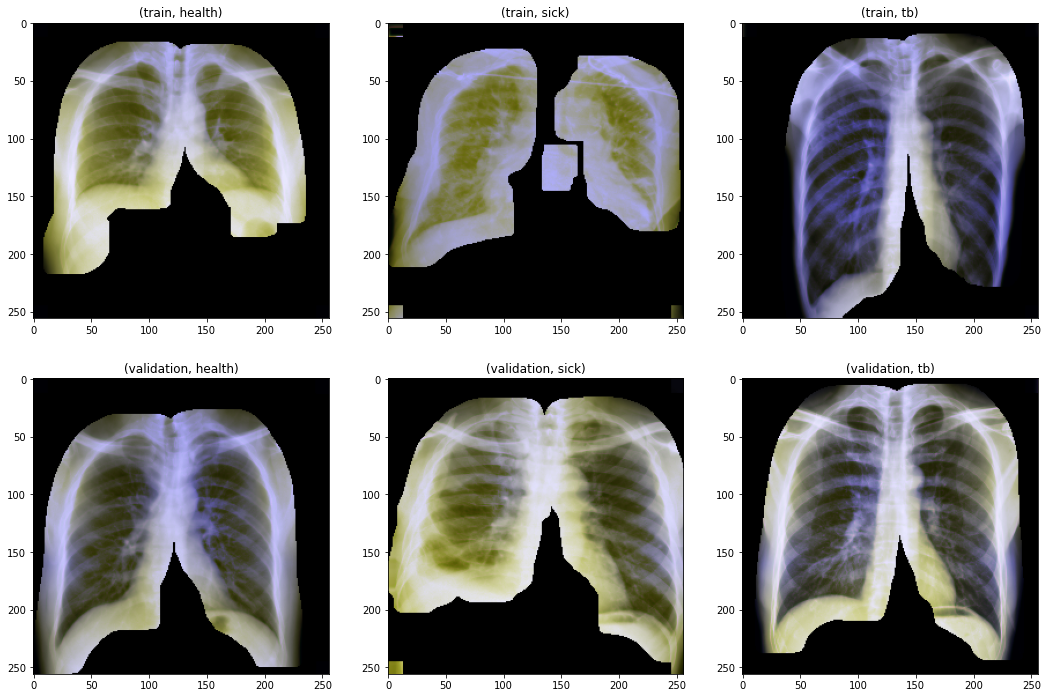

In [5]:
TBX11K_DIR = '/home/datasets/TBX11K/Merged'
SEGMENTED_DIR = '/home/datasets/TBX11K/Segmented'

inputs = ['train','validation']
classes = ['health','sick','tb']
fig, axs = plt.subplots(2,3, figsize=(18, 12))
x = 0
for input_dir in inputs:
    y=0
    for class_dir in classes:
        img_files = glob(os.path.join(SEGMENTED_DIR,input_dir,class_dir , '*.png'))
        #print(img_files[10])
        image = cv2.imread(img_files[77])
        axs[x, y].set_title("("+input_dir+', '+class_dir+")")
        axs[x, y].imshow(image)
        y+=1
    
    x +=1
plt.show()